In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.linear_model import LogisticRegression
import sklearn
from sklearn import linear_model
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


C:\Users\ckevi\AppData\Local\Temp\ipykernel_23572\3855455071.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('german.data', sep='\s+', header=None,index_col=0)
df.to_csv('my_file.csv',header=None)
df = pd.read_csv('my_file.csv')

In [4]:
replacements = {
        'Credit-history': {'A30': 1, 'A31': 2, 'A32': 3, 'A33': 4, 'A34': 5},
        'Purpose': {'A40': 1, 'A41': 2, 'A42': 3, 'A43': 4, 'A44': 5, 'A45': 6, 'A46': 7, 'A47': 8, 'A48': 9, 'A49': 10, 'A410': 11},
        'Savings-account': {'A61': 1, 'A62': 2, 'A63': 3, 'A64': 4, 'A65': 5},
        'Present-employment': {'A71': 1, 'A72': 2, 'A73': 3, 'A74': 4, 'A75': 5},
        'Other-debtors': {'A101': 1, 'A102': 2, 'A103': 3},
        'Property': {'A121': 1, 'A122': 2, 'A123': 3, 'A124': 4},
        'Other-installment': {'A141': 1, 'A142': 2, 'A143': 3},
        'Housing': {'A151': 1, 'A152': 2, 'A153': 3},
        'Telephone': {'A191': 1, 'A192': 2},
        'Foreign-worker': {'A201': 1, 'A202': 2},
        'Status': {'A11': 1, 'A12': 2, 'A13': 3, 'A14': 4},
        'Skill-level': {'A171': 1, 'A172': 2, 'A173': 3, 'A174': 4},
        'Checking-Account': {'A11': 1, 'A12': 2, 'A13': 3, 'A14': 4},
        'Status/sex': {'A91': 1,
                       'A92':  2,
                       'A93':  3,
                       'A94':  4,
                       'A95':  5},
        'Job': {'A171' : 1,
	      'A172' :  2,
        'A173' : 3,
	      'A174' :  4,},

    }

    # Iterate over the dictionary and perform the replacements
for column, mapping in replacements.items():
        if column in df.columns:
            df[column] = df[column].replace(mapping)
            
df['Credit-amount'] = pd.qcut(df['Credit-amount'], q=4,labels=[1,2,3,4])
df['Age'] = np.where(df['Age'] < 25, 1, 2)        

C:\Users\ckevi\AppData\Local\Temp\ipykernel_23572\1458639356.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace(mapping)


In [16]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
# Predict the responses for the test data
from sklearn.metrics import classification_report


y_pred = knn.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Optionally, display the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

# Optionally, display a more comprehensive classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Accuracy: 0.73
Confusion Matrix:
[[125  16]
 [ 38  21]]
Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.89      0.82       141
           2       0.57      0.36      0.44        59

    accuracy                           0.73       200
   macro avg       0.67      0.62      0.63       200
weighted avg       0.71      0.73      0.71       200



In [83]:

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

RandomForestClassifier()

In [84]:
from sklearn.metrics import classification_report


y_pred = model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Optionally, display the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

# Optionally, display a more comprehensive classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.80
Confusion Matrix:
[[128  13]
 [ 28  31]]
Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.91      0.86       141
           2       0.70      0.53      0.60        59

    accuracy                           0.80       200
   macro avg       0.76      0.72      0.73       200
weighted avg       0.79      0.80      0.79       200



In [85]:
from sklearn.ensemble import RandomForestClassifier
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [86]:
from sklearn.metrics import classification_report


y_pred = model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Optionally, display the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

# Optionally, display a more comprehensive classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.80
Confusion Matrix:
[[132   9]
 [ 31  28]]
Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.94      0.87       141
           2       0.76      0.47      0.58        59

    accuracy                           0.80       200
   macro avg       0.78      0.71      0.73       200
weighted avg       0.79      0.80      0.78       200



In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

X = df.drop('target', axis=1)
y = df['target']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

# Optional: Display the model with the best accuracy
best_model = max(results, key=results.get)
print(f"Best performing model: {best_model} with an accuracy of {results[best_model]:.4f}")

c:\Users\ckevi\anaconda3\envs\research\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7750
Confusion Matrix:
[[126  15]
 [ 30  29]]

SVM Accuracy: 0.7250
Confusion Matrix:
[[137   4]
 [ 51   8]]

Random Forest Accuracy: 0.8000
Confusion Matrix:
[[131  10]
 [ 30  29]]

Gradient Boosting Accuracy: 0.7150
Confusion Matrix:
[[110  31]
 [ 26  33]]

KNN Accuracy: 0.7300
Confusion Matrix:
[[125  16]
 [ 38  21]]

Best performing model: Random Forest with an accuracy of 0.8000


In [20]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Set the maximum column width to display full content
pd.set_option('display.max_colwidth', None)

In [15]:
df.head()

In [22]:
!pip install networkx


In [ ]:
model = LogisticRegression()

In [ ]:
model.coef_

In [32]:


prob = LpProblem("Minimize_Risk", LpMinimize)

# Create decision variables
decision_vars = LpVariable.dicts("Approve", df.index, cat='Binary')

# Objective Function: Minimize the total risk (sum of risk weighted by decision variables)
prob += lpSum([decision_vars[i] * df.loc[i, 'Risk'] for i in df.index])

# Constraints
# Constraint 1: Approve at least 2 applications
prob += lpSum([decision_vars[i] for i in df.index]) >= 2

# Constraint 2: Ensure credit is approved across different purposes
# This means ensuring at least one loan from each unique purpose is approved
unique_purposes = df['Purpose'].unique()
for purpose in unique_purposes:
    prob += lpSum([decision_vars[i] for i in df.index if df.loc[i, 'Purpose'] == purpose]) >= 1

# Solve the problem
prob.solve()

# Output the results
print("Status:", LpStatus[prob.status])



# Total risk of the approved loans
total_risk = sum([decision_vars[i].varValue * df.loc[i, 'Risk'] for i in df.index])
print("Total Risk:", total_risk)

Status: Optimal
Total Risk: 3.708333333333334


In [43]:
replacements = {
        'Credit-history': {'A30': 1, 'A31': 2, 'A32': 3, 'A33': 4, 'A34': 5},
        'Purpose': {'A40': 1, 'A41': 2, 'A42': 3, 'A43': 4, 'A44': 5, 'A45': 6, 'A46': 7, 'A47': 8, 'A48': 9, 'A49': 10, 'A410': 11},
        'Savings-account': {'A61': 1, 'A62': 2, 'A63': 3, 'A64': 4, 'A65': 5},
        'Present-employment': {'A71': 1, 'A72': 2, 'A73': 3, 'A74': 4, 'A75': 5},
        'Other-debtors': {'A101': 1, 'A102': 2, 'A103': 3},
        'Property': {'A121': 1, 'A122': 2, 'A123': 3, 'A124': 4},
        'Other-installment': {'A141': 1, 'A142': 2, 'A143': 3},
        'Housing': {'A151': 1, 'A152': 2, 'A153': 3},
        'Telephone': {'A191': 1, 'A192': 2},
        'Foreign-worker': {'A201': 1, 'A202': 2},
        'Status': {'A11': 1, 'A12': 2, 'A13': 3, 'A14': 4},
        'Skill-level': {'A171': 1, 'A172': 2, 'A173': 3, 'A174': 4},
        'Checking-Account': {'A11': 1, 'A12': 2, 'A13': 3, 'A14': 4},
        'Status/sex': {'A91': 1,
                       'A92':  2,
                       'A93':  3,
                       'A94':  4,
                       'A95':  5},
        'Job': {'A171' : 1,
	      'A172' :  2,
        'A173' : 3,
	      'A174' :  4,},

    }

    # Iterate over the dictionary and perform the replacements
for column, mapping in replacements.items():
        if column in df.columns:
            df[column] = df[column].replace(mapping)
            
        

C:\Users\ckevi\AppData\Local\Temp\ipykernel_14156\1441399239.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace(mapping)


In [44]:
df['Credit-amount'] = pd.qcut(df['Credit-amount'], q=4,labels=[1,2,3,4])

In [45]:
df['Age'].value_counts()

Age
27    51
26    50
23    48
24    44
28    43
25    41
30    40
35    40
36    39
31    38
29    37
32    34
33    33
34    32
37    29
22    27
40    25
38    24
42    22
39    21
46    18
43    17
47    17
44    17
41    17
45    15
20    14
21    14
49    14
50    12
48    12
54    10
57     9
52     9
51     8
55     8
63     8
61     7
53     7
60     6
65     5
58     5
64     5
66     5
74     4
67     3
68     3
56     3
59     3
75     2
19     2
62     2
70     1
Name: count, dtype: int64

In [65]:
data = {
    'Age': [25, 45, 35, 50, 20, 40, 30, 55, 22, 48, 60, 70, 75],
    'target': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
}

sample_df = pd.DataFrame(data)

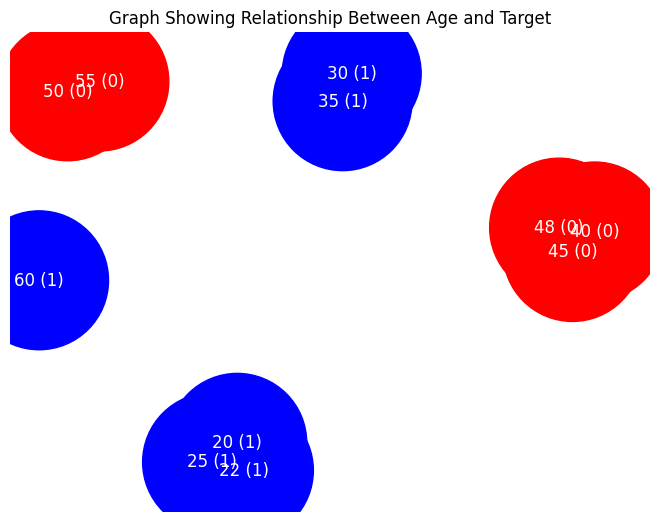

In [69]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Example data
data = {
    'Age': [25, 45, 35, 50, 20, 40, 30, 55, 22, 48, 60],
    'Target': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)

# Define age bands to group similar ages
# Including a wider range and a default category for unforeseen cases
age_bands = {20: '20-29', 30: '30-39', 40: '40-49', 50: '50-59', 60: '60+'}

# We apply a lambda that uses `age_bands.get(x, 'Unknown')` to handle any age not defined in age_bands
df['Age Band'] = df['Age'].apply(lambda x: age_bands.get(x // 10 * 10, '60+'))

# Creating a graph
G = nx.Graph()

# Add nodes with attributes
for index, row in df.iterrows():
    G.add_node(index, age=row['Age'], target=row['Target'], age_band=row['Age Band'])

# Add edges based on similar age band and identical target
for i in df.index:
    for j in df.index:
        if i != j and df.loc[i, 'Age Band'] == df.loc[j, 'Age Band'] and df.loc[i, 'Target'] == df.loc[j, 'Target']:
            G.add_edge(i, j)

# Node colors by target
color_map = ['blue' if G.nodes[node]['target'] == 1 else 'red' for node in G]

# Node labels by age
labels = {node: f"{G.nodes[node]['age']} ({G.nodes[node]['target']})" for node in G}

# Drawing the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, node_color=color_map, labels=labels, font_color='white',node_size=10000)
plt.title('Graph Showing Relationship Between Age and Target')
plt.show()



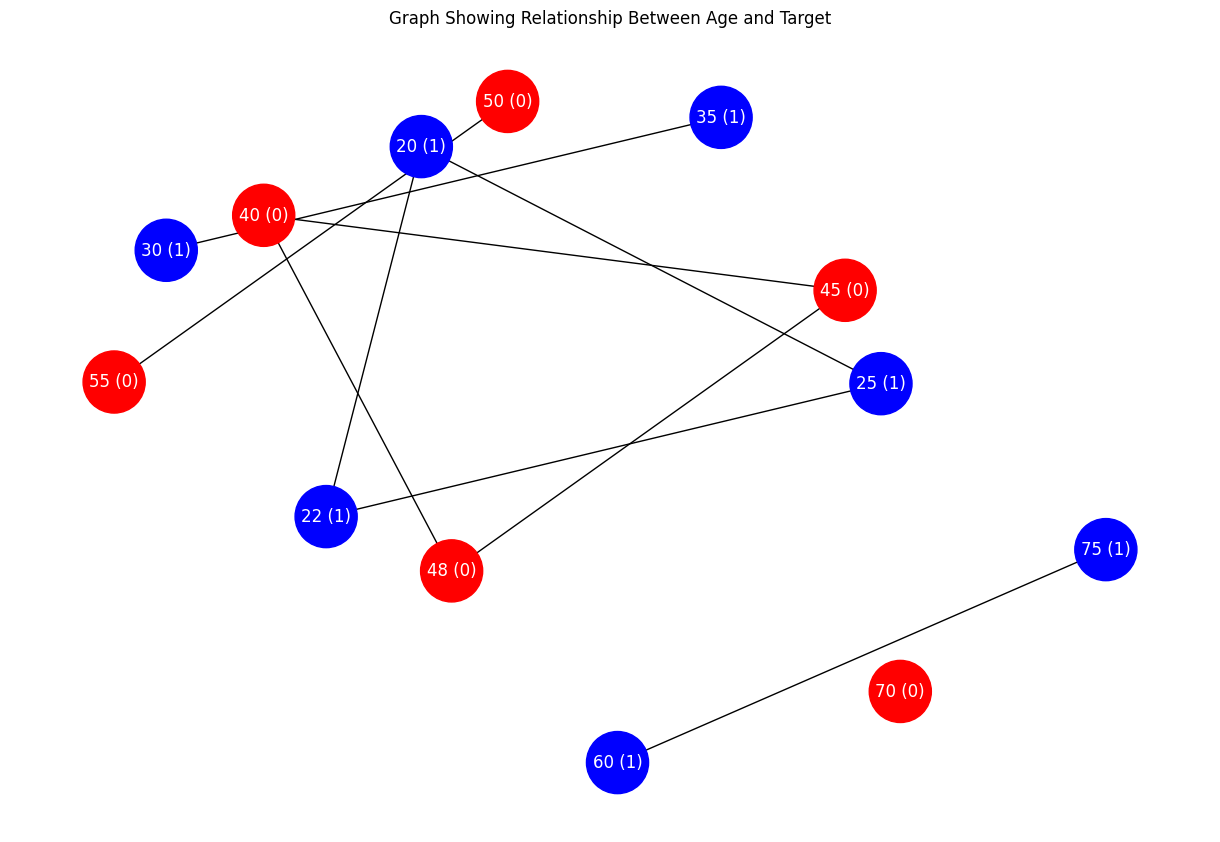

In [71]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Example data
data = {
    'Age': [25, 45, 35, 50, 20, 40, 30, 55, 22, 48, 60, 70, 75],
    'Target': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)

# Define dynamic age bands
def assign_age_band(age):
    if age < 60:
        return f"{age // 10 * 10}-{age // 10 * 10 + 9}"
    else:
        return "60+"

df['Age Band'] = df['Age'].apply(assign_age_band)

# Create the graph
G = nx.Graph()

# Add nodes with attributes
for index, row in df.iterrows():
    G.add_node(index, age=row['Age'], target=row['Target'], age_band=row['Age Band'])

# Add edges based on similar age band and identical target
for i in df.index:
    for j in df.index:
        if i != j and df.loc[i, 'Age Band'] == df.loc[j, 'Age Band'] and df.loc[i, 'Target'] == df.loc[j, 'Target']:
            G.add_edge(i, j)

# Define colors and labels
color_map = ['blue' if G.nodes[node]['target'] == 1 else 'red' for node in G]
labels = {node: f"{G.nodes[node]['age']} ({G.nodes[node]['target']})" for node in G}

# Use a layout that spreads nodes out more
pos = nx.kamada_kawai_layout(G)

# Increase figure size
plt.figure(figsize=(12, 8))

# Draw the graph
nx.draw(G, pos, node_color=color_map, labels=labels, font_color='white', node_size=2000, with_labels=True)
plt.title('Graph Showing Relationship Between Age and Target')
plt.show()


In [8]:
import pulp

# Adjusted Linear Programming with slack variables for a soft margin
lp_problem = pulp.LpProblem("Binary_Classification_Soft_Margin", pulp.LpMinimize)

# Slack variables, one for each data point
slacks = pulp.LpVariable.dicts("Slack", (i for i in range(len(df))), lowBound=0)

# Objective function to minimize the sum of slack variables
lp_problem += pulp.lpSum([slacks[i] for i in range(len(df))])
weights = pulp.LpVariable.dicts("Weights", (i for i in df.columns if i != 'target'), lowBound=None)
bias = pulp.LpVariable('bias', lowBound=None)

# Updated constraints with slack variables
for idx, row in df.iterrows():
    expr = pulp.lpSum([weights[col] * row[col] for col in df.columns if col != 'target']) + bias
    if row['target'] == 1:
        lp_problem += expr >= 1 - slacks[idx]  # Allow for some error
    else:
        lp_problem += expr <= -1 + slacks[idx]  # Allow for some error

# Solve the problem
lp_problem.solve()

# Output the updated results
print("Status:", pulp.LpStatus[lp_problem.status])
for v in weights.values():
    print(f"{v.name} = {v.varValue}")
print("bias =", bias.varValue)



Status: Optimal
Weights_Checking_Account = 0.41461796
Weights_Duration = -0.039657843
Weights_Credit_history = 0.36408496
Weights_Purpose = 0.027485958
Weights_Credit_amount = 0.1340307
Weights_Savings_account = 0.19509438
Weights_Present_employment = 0.14040037
Weights_Installment_rate = -0.15647189
Weights_Status_sex = 0.26526846
Weights_Other_debtors = 0.33835092
Weights_Present_residence = 0.020221882
Weights_Property = -0.18712946
Weights_Age = 0.18061296
Weights_Other_installment = 0.18427774
Weights_Housing = 0.29818347
Weights_Existing_credits = -0.26576838
Weights_Job = -0.0071613767
Weights_liable = -0.038807495
Weights_Telephone = 0.1721036
Weights_Foreign_worker = 0.76693575
bias = -4.1490675


In [ ]:
from scipy.stats import chi2_contingency
def calculateIndependence(df):
   

    columns_of_interest = df.columns.drop(['target'])


    chi_squared_results = []

    for column in columns_of_interest:
        contingency_table = pd.crosstab(df['target'], df[column])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        chi_squared_results.append({'Attribute': column, 'Chi-Square': chi2, 'P-Value': p})

    results_df = pd.DataFrame(chi_squared_results)

    results_df.sort_values(by='P-Value', ascending=True, inplace=True)

    print("Associations between 'target' and other columns:")
    print(results_df)
    return results_df

In [11]:
calculateIndependence(df)

Associations between 'target' and other columns:
             Attribute  Chi-Square       P-Value
0     Checking-Account  123.720944  1.218902e-26
2       Credit-history   61.691397  1.279187e-12
5      Savings-account   36.098928  2.761214e-07
4        Credit-amount   27.314286  5.058476e-06
1             Duration   78.886937  7.784572e-06
11            Property   23.719551  2.858442e-05
14             Housing   18.199842  1.116747e-04
3              Purpose   33.356447  1.157491e-04
6   Present-employment   18.368274  1.045452e-03
13   Other-installment   12.839188  1.629318e-03
12                 Age    9.375168  2.199446e-03
19      Foreign-worker    5.821576  1.583075e-02
8           Status/sex    9.605214  2.223801e-02
9        Other-debtors    6.645367  3.605595e-02
7     Installment-rate    5.476792  1.400333e-01
18           Telephone    1.172559  2.788762e-01
15    Existing-credits    2.671198  4.451441e-01
16                 Job    1.885156  5.965816e-01
10   Present-residen

,Attribute,Chi-Square,P-Value
0,Checking-Account,123.720944,1.218902e-26
2,Credit-history,61.691397,1.279187e-12
5,Savings-account,36.098928,2.761214e-07
4,Credit-amount,27.314286,5.058476e-06
1,Duration,78.886937,7.784572e-06
11,Property,23.719551,2.858442e-05
14,Housing,18.199842,1.116747e-04
3,Purpose,33.356447,1.157491e-04
6,Present-employment,18.368274,1.045452e-03
13,Other-installment,12.839188,1.629318e-03
